In [1]:
import os
from random import sample
import sys
print(os.path.abspath(os.curdir))  
os.chdir("..")  # go to parent folder
os.chdir("..")  # go to parent folder

print(os.path.abspath(os.curdir))  
sys.path.insert(0, os.path.abspath(os.curdir))
from NMRKineticSimu import Xe129, Methanol, Mainz, TestStation, MagVec
from NMRKineticSimu import *
from DataAnalysis import *
from functioncache import check
sqdsensor = SQUID(name='Virtual SQUID',
                 Mf = 1.,
                 Rf = 1.  # in Ohm
         )

\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\Supplementary\20220818_AxionWindSimulation
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code


C:\Users\zhenf\AppData\Local\Temp/ipykernel_12264/1082482329.py @7 ALPnuorder : int(6) 
Nuclear resonate frequency: 9.999600e+05 Hz
ALP compton frequency: 1.000000e+06 Hz
C:\Users\zhenf\AppData\Local\Temp/ipykernel_12264/1082482329.py @38 magnetization.nu_rot : float(40.000000000116415) 
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @524 numofsampling : int(1) 
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @545 BALPamp_array : ndarray([4.77728605e-07]) [shape=(1,)]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @572 numofstep_lastperiod : int(33482) 


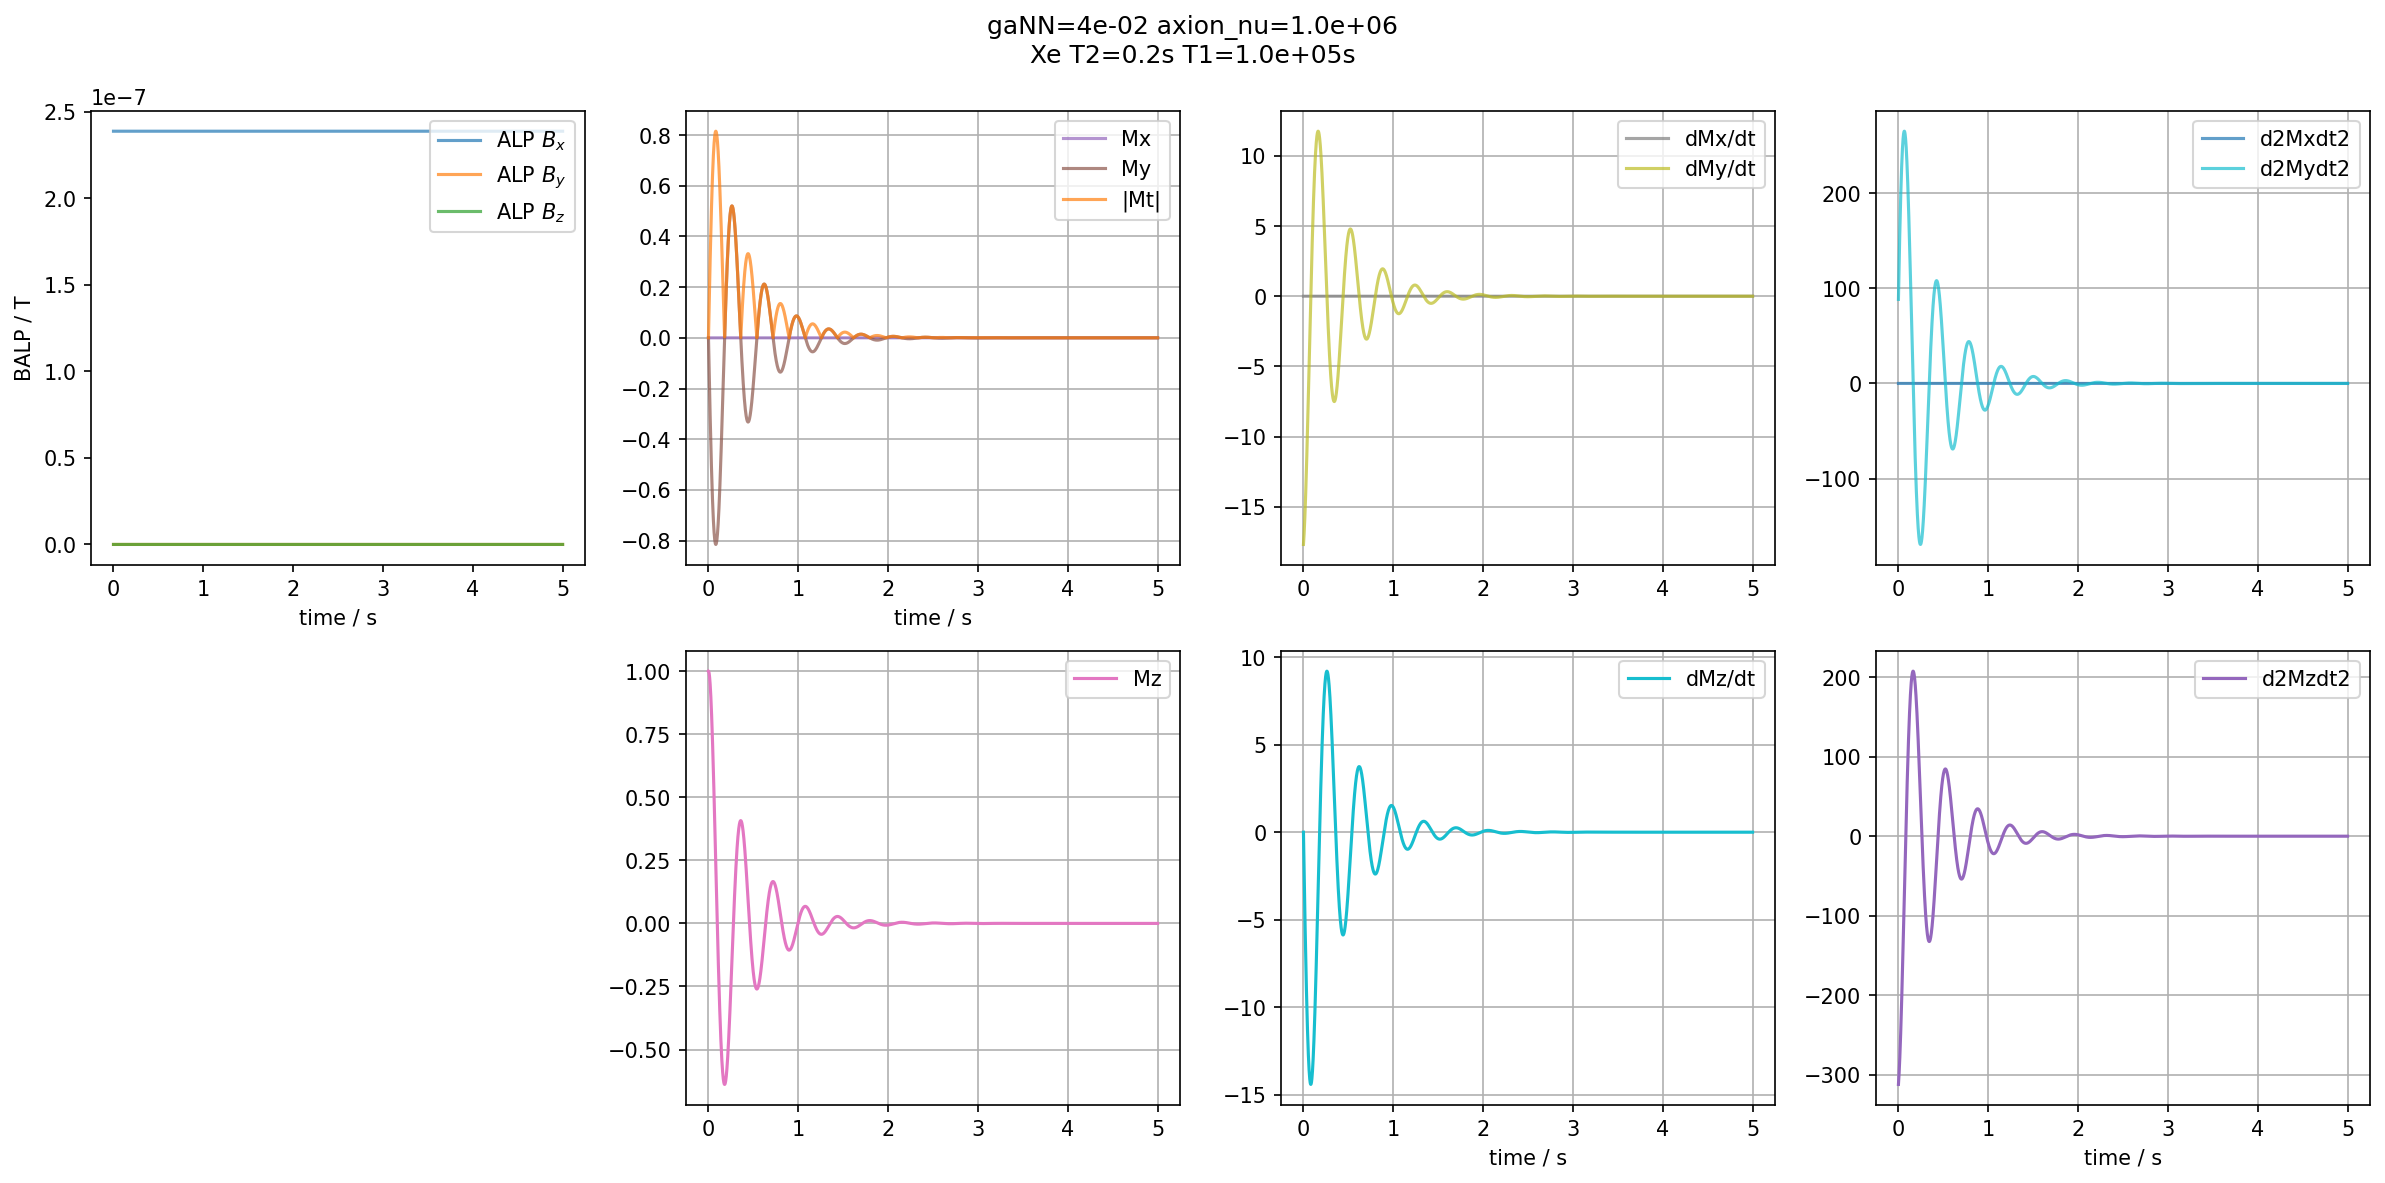

TrajectoryVisualization_gaNN=4e-02_axion_nu=1.0e+06_Xe_T2=0.2s_T1=1.0e+05s


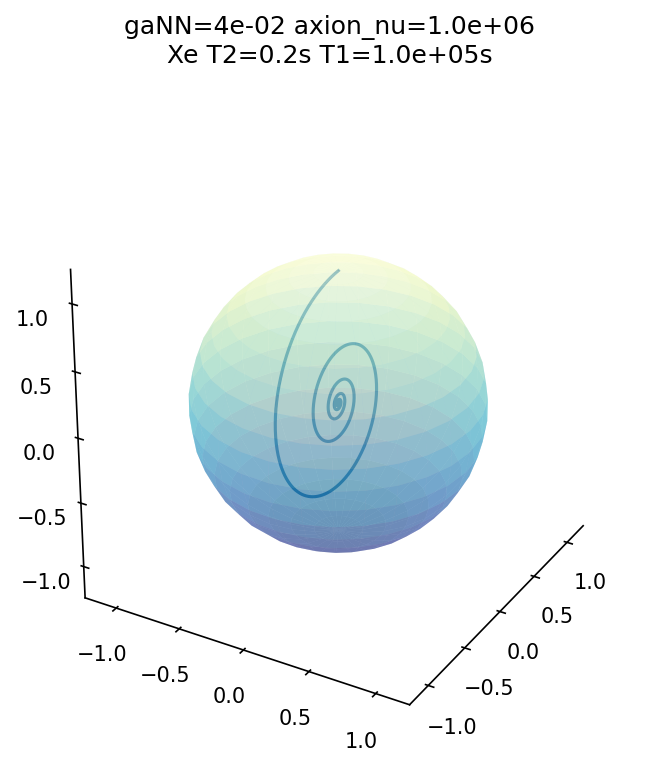

***************************************************************************
T2* = 2.000000e-01
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1397 self.avgMxsq : float64(1.2928135623027786e-34) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1398 self.avgMysq : float64(0.0199993822502222) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1399 self.avgMzsq : float64(0.021614704492520117) [shape=()]
\\desktop-3ge6tor\d\Yu0702\casper-gradient-code\NMRKineticSimu.py @1400 np.sqrt(self.avgMxsq+self.avgMysq) : float64(0.1414191721451593) [shape=()]
**************************************************************************


In [12]:
listofGammaandSAmp = []
listofT2andavgMtsq = []
listofspectrum = []
gaNNorder_arr = np.arange(-2.,-11.,-0.5)
ALPnuorder_arr = np.arange(3.,7.,1)
for ALPnuorder in [6]:
	check(ALPnuorder)
	for T2star in [.2]:  #0.0001, 0.001, , 0.1 5.0, 10.0, , 20.0, 30.0, 40.0, 50.0, 100.0 0.1,  [2,10,50,100], 10**(1.5), 100, 10**(2.5), 1000
		# [0.1, 1, 10**(0.5), 10, 10**(1.5), 100, 10**(2.5), 1000]
		# 
		# check(T2star)
		for gaNNorder in [-1.4]:
			# check(gaNNorder)
			axionwind = AxionWind(
				name='ALP',
				nu=10 ** ALPnuorder,  # compton frequency in [Hz]
				Gamma=5. * 10. ** (-6),  # spectrum linewidth. 
				gaNN=10**gaNNorder,  # in Gev^-1
				direction_solar=np.array([1, 90*np.pi/180., - 90. * np.pi / 180]),
				verbose=False
				)
			magnetization = MagVec(
					name='liquid Xe',
					sample=Xe129,  # class Sample
					gyroratio=(2*np.pi)*11.777*10**6,  # [Hz/T]
					init_time=0.,  # [s]
					station=TestStation,
					init_magamp=1.,
					init_magtheta=0.,  # [rad]
					init_magphi=0.,  # [rad]
					B0z=(10**ALPnuorder - 40) / Xe129.gyroratio * 2 * np.pi,  # [T]
					simurate=(6696.42871094),  # max(10000, a
					ALPwind=axionwind,
					T2=1.0*T2star,  # 1.0/(np.pi*samplelinewidth)
					T1=100000.0,
					verbose=False,
					)
			check(magnetization.nu_rot)
			# tic = time.perf_counter()
			magnetization.GenerateParam(
					numofcohT=1,  #max(10 * T2star, 1)
					method='RandomJump',  #'ThermalLight' 'RandomJump' 'InfCoherence'
					showplt=False,  # whether to plot B_ALP
					plotrate=0.1,
					verbose=False
					)
			# toc = time.perf_counter()
			# print(f'GenerateParam time consumption = {toc-tic:.3f} s')
			# simurate 1000, numofcohT=100/axionwind.cohT, not usejit. time = 2.3 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit. time = 1.8 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit(types blabla). time = 0.1 s
			# simurate 1000, numofcohT=1000/axionwind.cohT, usejit @jit(types blabla). time = 1.1 s
			# simurate 1000, numofcohT=100000/axionwind.cohT, usejit @jit(types blabla). time = 107.1 s

			tic = time.perf_counter()
			magnetization.GenerateTrajectory(verbose=False)
			toc = time.perf_counter()
			# print(f'GenerateTrajectory time consumption = {toc-tic:.3f} s')
			# simurate 1000, numofcohT=100/axionwind.cohT, not usejit. time = 4.2 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit. time = 1.6 s
			# simurate 1000, numofcohT=100/axionwind.cohT, usejit @jit(types blabla). time = 0.208 s
			# simurate 1000, numofcohT=1000/axionwind.cohT, usejit @jit(types blabla). time = 2.069 s

			magnetization.MonitorTrajectory(plotrate=10**3,verbose=True)
			magnetization.VisualizeTrajectory3D(
			        plotrate=10**3,  # [Hz]
			        # rotframe=True,
			        verbose=False,
			    )
			# magnetization.SaveTrajectory(
			# 		h5fpathandname=f'K:/CASPEr data/20220522_NMRKineticSimu_data_test2/sample_IDEN/'+\
			# 						f'simudata_test2_ALPwind.nu_1e{ALPnuorder:.1f}_gaNN_1e{gaNNorder:.1f}_samplelinewidth_{samplelinewidth:g}_'+\
			# 							f'T1_{magnetization.T1:g}_T2_{magnetization.T2:.3g}',
			# 		saveintv=1,  # int
			# 		verbose=False
			# )
			print(f'***************************************************************************')
			print(f'T2* = {magnetization.T2:e}')
			magnetization.StatTrajectory(verbose=True)
			print(f'**************************************************************************')
			# processdata = False
			# if processdata:

In [ ]:
liastream = LIASignal(
	name='LIA data',
	device='LIA',
	device_id='dev4434',
	file=f'T2star {T2star:g}',
	verbose=True
	)
liastream.attenuation = 0
liastream.filterstatus = 'off'
liastream.LIAfilter_TC=0.0
liastream.LIAfilter_order = 0
liastream.dmodfreq = magnetization.B0z * Xe129.gyroratio / (2 * np.pi)
saveintv = 1
liastream.samprate = magnetization.simurate / saveintv
check(magnetization.timestamp.shape)
check(magnetization.trjry[0:-1:saveintv, 0].shape)

liastream.dataX = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 0] #* \
	#np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
liastream.dataY = 0.5 * magnetization.trjry[int(0*magnetization.simurate):-1:saveintv, 1] #* \
	#np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

# liastream.dataX = 0.5 * 1 * \
# 	np.cos(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])
# liastream.dataY = 0.5 * 1 * \
# 	np.sin(2 * np.pi * magnetization.nu_rot * magnetization.timestamp[0:-1:saveintv])

liastream.GetSpinNoisePSD(
	chunksize=10*magnetization.T2,  # magnetization.T2
	analysisrange = [0, -1],  # [0, int(9*samplelinewidth*liastream.samprate)]
	interestingfreq_list=[],
	# ploycorrparas=ployparas,
	ploycorrparas=[],
	showstd=False,
	# stddev_range=[1.349150e6,1.349750e6],
	verbose=False)
liastream.FitPSD(
		fitfunction = 'Lorentzian',  # 'Lorentzian' 'dualLorentzian' 'tribLorentzian' 'Gaussian 'dualGaussian' 'auto' 'Polyeven' 
		inputfitparas = ['auto','auto','auto','auto'],
		smooth=False,
		smoothlevel=1,
		fitrange=['auto','auto'],
		alpha=0.05, 
		
		getresidual=False, 
		getchisq=False, 
		verbose=False    
	)
specxaxis, spectrum, specxunit, specyunit = liastream.GetSpectrum(
	showtimedomain=False,
	showacqdata=True,
	showfreqdomain=True,
	showfit=True,
	showresidual=False,
	showlegend=True,  # !!!!!show or not to show legend
	spectype='PSD',  # in 'PSD', 'ASD', 'FLuxPSD', 'FluxASD'
	ampunit='V',
	Mf=sqdsensor.Mf,
	Rf=sqdsensor.Rf,
	specxunit='Hz',  # 'Hz' 'kHz' 'MHz' 'GHz' 'ppm' 'ppb'
	specxlim = [axionwind.nu - 300, axionwind.nu + 300],
	# specylim=[0, 4e-23],
	# specxunit2 = 'ppm', 
	# referfreq=liastream.dmodfreq,
	# specx2format = '{:.0f}',
	
	specyscale='linear',  # 'log', 'linear'
	showstd=False,
	
	figsize=(10,6),

	top=0.85,
	bottom=0.03,
	left=0.11,
	right=0.98,
	hspace=0.73,
	wspace=0.2,

	showplt_opt=True,
	return_opt=True,
	verbose=False
	)
print(f'linewidth = {1.0 / (np.pi * T2star):g} Hz, np.amax(spectrum) = {np.amax(spectrum):.2e}')
listofGammaandSAmp.append([T2star, np.amax(spectrum)])
listofT2andavgMtsq.append([magnetization.T2, magnetization.avgMxsq + magnetization.avgMysq])  # , np.sum(spectrum), np.amax(spectrum)
print(f'T2star = {T2star:g} , avg Mt sq = {magnetization.avgMxsq + magnetization.avgMysq:.2e}')

# listofspectrum.append(spectrum)
# K:\CASPEr data\20220522_NMRKineticSimu_data_test2
# f'\\\\Desktop-3ge6tor/d/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220522_test0/sample_IDEN/'

In [ ]:


T2andavgMtsq_arr = np.array(listofT2andavgMtsq)
GammaandSAmp_arr = np.array(listofGammaandSAmp)
# spectrum_arr = np.array(listofspectrum)
check(T2andavgMtsq_arr)
check(GammaandSAmp_arr)
# filepath = 'D:/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220527_test1/'
filepath = 'K:/CASPEr data/20220531_NMRKineticSimu_data_test7/'
np.savetxt(filepath + f'T2andavgMtsq_gaNN_-7_resol_match.txt', T2andavgMtsq_arr)
# np.savetxt(f'D:/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220524_test1/GammaandSAmp_resol_1Hz.txt', GammaandSAmp_arr)
# np.savetxt(f'D:/Mainz/CASPEr/20220522_NMRKineticSimu_data/20220524_test1/spectrum_arr_resol_1Hz.txt', spectrum_arr)


fig = plt.figure(figsize=(10, 4), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=2)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])
# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='PSD Signal Amp', color='tab:cyan', alpha=1)
ax.plot(np.abs(T2andavgMtsq_arr[:, 0]), T2andavgMtsq_arr[:, 1], label='avgMtsq', color='tab:blue', alpha=1)
ax.scatter(np.abs(T2andavgMtsq_arr[:, 0]), T2andavgMtsq_arr[:, 1], marker='x', s=40, color='tab:blue', alpha=1)

# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='SNR', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('avgMtsq')  #  / $\Phi_0^{2} / Hz$
ax.set_xlabel('T2* / s')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-13, 1e0)
ax.grid()


ax01 = fig.add_subplot(gs[0,1])
ax01.plot(T2andavgMtsq_arr[:, 0], T2andavgMtsq_arr[:, 2], \
    color='tab:orange', label='Power / V^2', alpha=1)
ax01.scatter(T2andavgMtsq_arr[:, 0], T2andavgMtsq_arr[:, 2], \
    color='tab:orange', marker='x', s=30,  alpha=1)
# ax01.plot(GammaandSAmp_arr[:, 0], (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', label='Signal-to-noise ratio', alpha=1)
# ax01.scatter(GammaandSAmp_arr[:, 0],  (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', marker='x', s=30,  alpha=1)
ax01.set_ylabel('Power / V^2')
ax01.set_xlabel('T2* / s')
ax01.set_xscale('log')
ax01.set_yscale('log')
# ax01.set_ylim(1e-13, 1e0)
ax01.grid()
# ax01.set_title('Signal-to-noise ratio')
# fig.suptitle('chunksize = 1.0/samplelinewidth')
fig.suptitle('resolution = 1 Hz')

plt.tight_layout()
plt.show()


fig = plt.figure(figsize=(10, 4), dpi=150)  #
gs = gridspec.GridSpec(nrows=1, ncols=2)  #
# fig.subplots_adjust(left=left_spc, top=top_spc, right=right_spc,
#                     bottom=bottom_spc, wspace=xgrid_spc, hspace=ygrid_spc)
ax = fig.add_subplot(gs[0,0])
# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='PSD Signal Amp', color='tab:cyan', alpha=1)
ax.plot(np.abs(GammaandSAmp_arr[:, 0]), GammaandSAmp_arr[:, 1], label='PSD Signal Amp', color='tab:blue', alpha=1)
ax.scatter(np.abs(GammaandSAmp_arr[:, 0]), GammaandSAmp_arr[:, 1], marker='x', s=40, color='tab:blue', alpha=1)

# ax.plot(GammaandSAmp_arr[:, 0], GammaandSAmp_arr[:, 1], label='SNR', alpha=1)
# ax.step(, , where='post', label='', alpha=1)
ax.set_ylabel('PSD Signal Amplitude')  #  / $\Phi_0^{2} / Hz$
ax.set_xlabel('Sample linewidth / Hz')
# ax.set_title('PSD Signal Amplitude')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-13, 1e0)
ax.grid()


ax01 = fig.add_subplot(gs[0,1])
ax01.plot(GammaandSAmp_arr[:, 0], np.sqrt(GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
    color='tab:orange', label='Signal-to-noise ratio', alpha=1)
ax01.scatter(GammaandSAmp_arr[:, 0], np.sqrt(GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
    color='tab:orange', marker='x', s=30,  alpha=1)
# ax01.plot(GammaandSAmp_arr[:, 0], (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', label='Signal-to-noise ratio', alpha=1)
# ax01.scatter(GammaandSAmp_arr[:, 0],  (GammaandSAmp_arr[:, 0]) * GammaandSAmp_arr[:, 1], \
#     color='tab:orange', marker='x', s=30,  alpha=1)
ax01.set_ylabel('Adopted SNR in PSD')
ax01.set_xlabel('Sample linewidth / Hz')
ax01.set_xscale('log')
ax01.set_yscale('log')
# ax01.set_ylim(1e-13, 1e0)
ax01.grid()
# ax01.set_title('Signal-to-noise ratio')
# fig.suptitle('chunksize = 1.0/samplelinewidth')
fig.suptitle('resolution = 1 Hz')

plt.tight_layout()
plt.show()